<a href="https://colab.research.google.com/github/AndriiGoz/traffic_signs_classification/blob/master/traffic_signs_classification_lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Traffic Signs with LeNet-5 CNN
The purpose of this project is to train an implementation of the LeNet-5 Convolutional Neural Network for the classification of traffic signs. The model will be used in an application, where the user can upload a photo of a traffic sign and get the prediction of its class.


### 1. Mount Google Drive
The dataset was taken from *The German Traffic Sign Recognition Benchmark (GTSRB): https://benchmark.ini.rub.de/gtsrb_dataset.html.* It consists of about 40.000 real colorful photos of german traffic signs. The images have .ppm extension and their size varies from 15x15 to 250x250 pixels. We save the dataset on Google Drive and access it using *drive.mount* command.

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


### 2. Import libraries
Here we just import libraries we need in our Project: 
- some standard ones as NumPy, OS and Matplotlib;
- cv2, a powerful library developed for solving computer vision tasks (https://opencv.org/);
- [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) for splitting the dataset into train and test subsets;
- some components from [tf.keras.models](https://www.tensorflow.org/api_docs/python/tf/keras/models)...;
- and from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) for building the model.

In [163]:
import numpy as np
import random
import os
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Rescaling, AveragePooling2D, Dropout

### 3. Read and pre-process image files
We start with reading images from the dataset. The images are distributed over 43 folders representing 43 classes. We loop through folders and through images, open them, resize to 32x32 pixels, convert them from RGB to gray and save them as np.arrays.

In [164]:
images = []
labels = []
classes = 43

current_path = '/content/gdrive/My Drive/GTSRB/Final_Training/Images/'

for i in range(classes):
    path = os.path.join(current_path, str(str(i).zfill(5)))
    img_folder = os.listdir(path)
    for j in img_folder:
        try:
            image = cv.imread(str(path+'/'+j))
            image = cv.resize(image, (32, 32))
            image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
            image = np.array(image)
            images.append(image)
            label = np.zeros(classes)
            label[i] = 1.0
            labels.append(label)
        except:
            pass

We divide images with 255 to get pixel values between 0.0 and 1.0. Finally we have got the total amount of 39.209 images assigned to 43 classes.

In [165]:
images = np.array(images)
images = images/255
labels = np.array(labels)
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)

Images shape: (39204, 32, 32)
Labels shape: (39204, 43)


### 4. Split Dataset into *train* and *test* subsets
The dataset has to be splitted now into train ang test subsets. For test subset we take out standard 20% of the dataset.

In [170]:
X = images.astype(np.float32)
y = labels.astype(np.float32)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (31363, 32, 32)
y_train shape: (31363, 43)
X_test shape: (7841, 32, 32)
y_test shape: (7841, 43)


Let's take a look at some samples from our dataset. We pick up 25 random images and plot them together with treir labels.

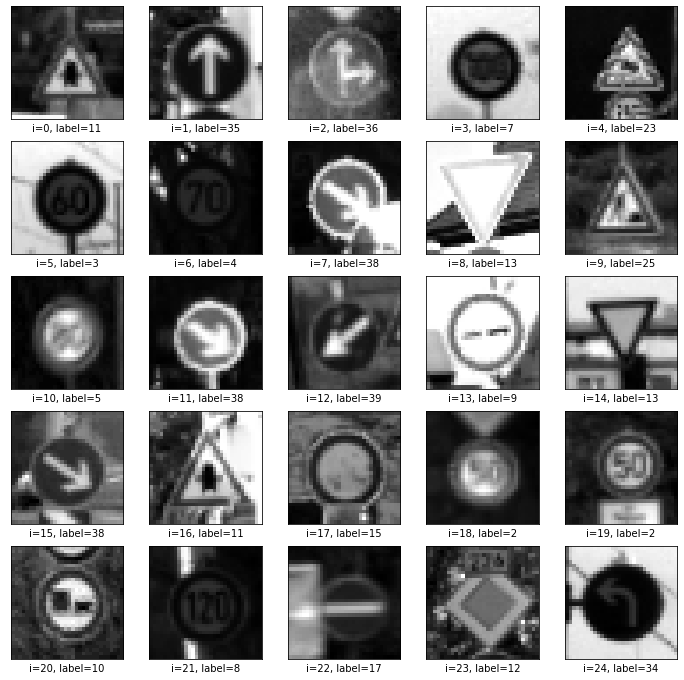

In [171]:
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(X_train[start_index+i], cmap='gray')
plt.show()

### 5. Build the model
The dataset is splitted into train ang test subsets. Then we add Dropout Layer with factor 0.1 to prevent overfitting.

In [186]:
# Building the model
model = Sequential([
    Rescaling(1, input_shape=(32, 32, 1)),
    Conv2D(filters=6, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
    AveragePooling2D(pool_size=(2, 2)),
    Conv2D(filters=120, kernel_size=(5, 5), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(units=84, activation='relu'),
    Dense(units=43, activation='softmax')
])

# Compilation of the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model architecture
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_17 (Rescaling)    (None, 32, 32, 1)         0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_34 (Avera  (None, 14, 14, 6)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_41 (Conv2D)          (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_35 (Avera  (None, 5, 5, 16)         0         
 gePooling2D)                                                    
                                                                 
 conv2d_42 (Conv2D)          (None, 1, 1, 120)       

### 6. Train the model

In [187]:
history = model.fit(X_train, y_train, epochs=50,
                    validation_data=(X_test, y_test))

Epoch 1/50
981/981 [==============================] - 20s 20ms/step - loss: 1.8340 - accuracy: 0.4841 - val_loss: 0.7023 - val_accuracy: 0.7970
Epoch 2/50
981/981 [==============================] - 19s 19ms/step - loss: 0.6605 - accuracy: 0.8024 - val_loss: 0.3955 - val_accuracy: 0.8876
Epoch 3/50
981/981 [==============================] - 19s 19ms/step - loss: 0.4354 - accuracy: 0.8677 - val_loss: 0.2913 - val_accuracy: 0.9189
Epoch 4/50
981/981 [==============================] - 19s 19ms/step - loss: 0.3229 - accuracy: 0.9038 - val_loss: 0.2208 - val_accuracy: 0.9383
Epoch 5/50
981/981 [==============================] - 19s 19ms/step - loss: 0.2535 - accuracy: 0.9233 - val_loss: 0.1671 - val_accuracy: 0.9579
Epoch 6/50
981/981 [==============================] - 19s 19ms/step - loss: 0.2054 - accuracy: 0.9384 - val_loss: 0.1440 - val_accuracy: 0.9642
Epoch 7/50
981/981 [==============================] - 19s 19ms/step - loss: 0.1766 - accuracy: 0.9474 - val_loss: 0.1263 - val_accuracy:

### 7. Evaluate training results
After 50 epochs we received the accuracy of almost 99,1%, which is quite good. Thus we stop here.

In [188]:
val_loss, val_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nValifdation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

246/246 - 2s - loss: 0.0687 - accuracy: 0.9906 - 2s/epoch - 7ms/step

Valifdation accuracy: 0.9905624389648438

Validation loss: 0.06868665665388107


Let's create plots of loss and accuracy on the training and validation sets.

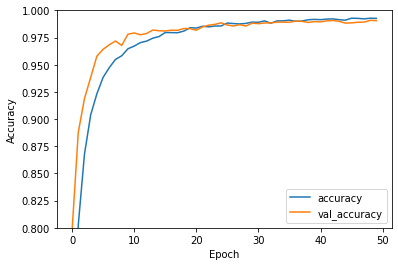

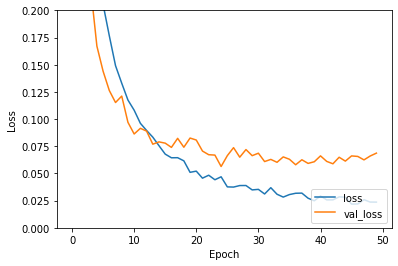

In [189]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.2])
plt.legend(loc='lower right')

As we see from the plots, train and validation accuracy go close, validation loss doesn't go up. So, the model looks fine, we do not have much overfitting here.

### 8. Prediction for sampless
Let's take a look at some samples and find wrong classified pictures. We label the images with *prediction* and *ground truth* classes. If prediction equals ground truth, we assign green colour to the label, othervise we make it red.

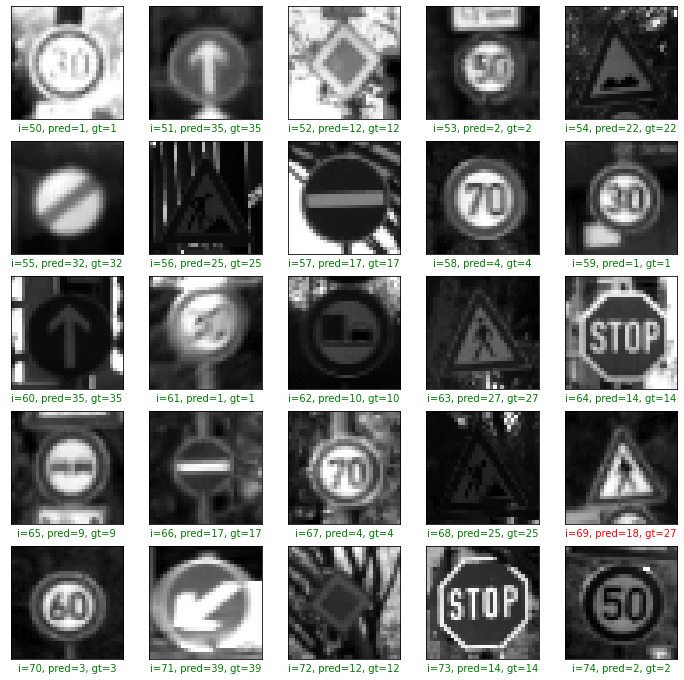

In [207]:
preds = model.predict(X_test)

plt.figure(figsize=(12, 12))
start_index = 50
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(X_test[start_index+i], cmap='gray')
plt.show()

For image number 69 we can see that "Pedestrians" sign was misclassified as "General caution". Probably the shape of pedestrian was recognized here as exclamation point.

### 9. Save the model
In the end, we save the model to a separate folder on Google Drive. It will be used for further predictions in the application for traffic signs recognition.

In [192]:
model.save('/content/gdrive/My Drive/keras_model/')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/assets
